# Calipso

Calipso products can be downloaded by using the ``download`` method of the corresponding product object. For this example we will have a look at the cloud layer top and base height at 333 m resolution contained in the 333mCLay product as well as some aerosol variables from 05kmAPro.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from datetime import datetime
t_0 = datetime(2016, 11, 21, 10)
t_1 = datetime(2016, 11, 21, 12)

## 333mCLay
This product contains the top and bottom altitudes of up to five detected cloud layers on the highest resolution: 1/3 km horizontally and 30 m vertically. It is available from about 8.3 km to -0.5 km amsl (see [here](https://www-calipso.larc.nasa.gov/resources/calipso_users_guide/data_summaries/layer/index.php)).

In [2]:
from pansat.products.satellite.calipso import clay333m

files_clay = clay333m.download(t_0, t_1)

Please enter your pansat user password:


 ············


The variable ``files_clay`` now contains the downloaded files. Now we only need to decipher the data format and extract the data of interest.

In [3]:
dataset = clay333m.open(files_clay[0])
display(dataset)

<xarray.Dataset>
Dimensions:              (layers: 5, one: 1, rays: 55920)
Coordinates:
  * rays                 (rays) int64 0 1 2 3 4 ... 55916 55917 55918 55919
  * layers               (layers) int64 0 1 2 3 4
  * one                  (one) int64 0
    latitude             (rays) float32 75.01558 75.01808 ... -64.56511
    longitude            (rays) float32 13.138031 13.131451 ... -163.55202
Data variables:
    layer_top_altitude   (rays, layers) float32 1.130534 -9999.0 ... -9999.0
    layer_base_altitude  (rays, layers) float32 0.86109054 -9999.0 ... -9999.0
    num_layers           (rays, one) int8 1 1 1 2 1 1 1 1 1 ... 1 1 1 1 1 1 1 1

Text(0.0, 1.0, '(a) Cloud layers height')

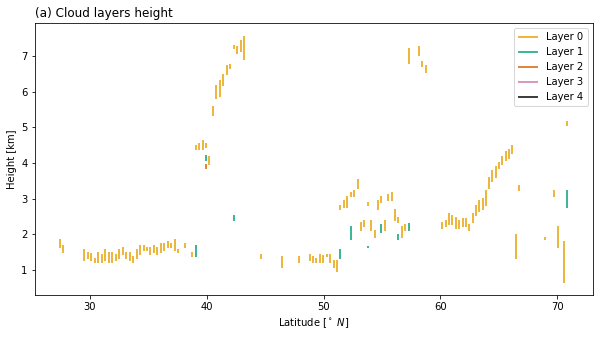

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Convert -9999 to Nan
tops = dataset.layer_top_altitude.where(dataset.layer_top_altitude != -9999.)
bases = dataset.layer_base_altitude.where(dataset.layer_base_altitude != -9999.)

start = 10000
end = 25000
stride = 100
tops = tops[start:end:stride, :]
bases = bases[start:end:stride, :]
lats = dataset["latitude"][start:end:stride]

plt.figure(figsize=(10, 5))
cols = ["#E69F00", "#009E73", "#D55E00", "#CC79A7", "#000000"]
for i in range(5):
    plt.vlines(lats, bases[:, i], tops[:, i], color=cols[i], label=f"Layer {i}")
plt.xlabel(r"Latitude [$^\circ\ N$]")
plt.ylabel("Height [km]");
plt.legend()
plt.title("(a) Cloud layers height", loc="left")

Text(0.0, 1.0, '(b) Number of cloud layers')

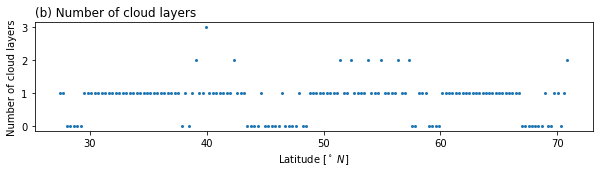

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

start = 10000
end = 25000
stride = 100
num_layers = dataset.num_layers[start:end:stride]
lats = dataset["latitude"][start:end:stride]

plt.figure(figsize=(10, 2))
plt.plot(lats, num_layers, "o", markersize=2)
plt.xlabel(r"Latitude [$^\circ\ N$]")
plt.ylabel("Number of cloud layers");
plt.title("(b) Number of cloud layers", loc="left")

## 05kmAPro

This product contains profile information about aerosol layers at 5 km horizontal resolution (vertical resolution is 60 m, although stratospheric features in the altitude range of 20-30 km are reported on 180 m vertically)
(see [here](https://www-calipso.larc.nasa.gov/resources/calipso_users_guide/data_summaries/profile_data_v420.php)).  
See pansat/products/satellite/calipso/apro5km.ini for all implemented variables from this product.

In [6]:
from pansat.products.satellite.calipso import apro5km

files_alay = apro5km.download(t_0, t_1)
dataset = apro5km.open(files_alay[0])
display(dataset)

<xarray.Dataset>
Dimensions:                                                       (bounds: 3, one: 1, range_bins: 399, rays: 3728)
Coordinates:
  * rays                                                          (rays) int64 0 ... 3727
  * one                                                           (one) int64 0
  * range_bins                                                    (range_bins) int64 0 ... 398
    latitude                                                      (rays, bounds) float32 75.01558 ... -64.56511
    longitude                                                     (rays, bounds) float32 13.138031 ... -163.55202
Dimensions without coordinates: bounds
Data variables:
    column_optical_depth_tropospheric_aerosols_532                (rays, one) float32 0.0 ... 0.00983419
    column_optical_depth_tropospheric_aerosols_uncertainty_532    (rays, one) float32 -9999.0 ... 0.0050350227
    column_optical_depth_stratospheric_aerosols_532               (rays, one) float32 0.0 ... 0.0
    column_optical_depth_stratospheric_aerosols_uncertainty_532   (rays, one) float32 -9999.0 ... -9999.0
    column_optical_depth_tropospheric_aerosols_1064               (rays, one) float32 0.0 ... 0.005808709
    column_optical_depth_tropospheric_aerosols_uncertainty_1064   (rays, one) float32 -9999.0 ... 0.009492179
    column_optical_depth_stratospheric_aerosols_1064              (rays, one) float32 0.0 ... 0.0
    column_optical_depth_stratospheric_aerosols_uncertainty_1064  (rays, one) float32 -9999.0 ... -9999.0
    column_integrated_backscatter_532                             (rays, one) float32 0.0543034 ... 0.07334211
    total_backscatter_coefficient_532                             (rays, range_bins) float32 -9999.0 ... -9999.0
    total_backscatter_coefficient_uncertainty_532                 (rays, range_bins) float32 -9999.0 ... -9999.0
    perpendicular_backscatter_coefficient_532                     (rays, range_bins) float32 -9999.0 ... -9999.0
    perpendicular_backscatter_coefficient_uncertainty_532         (rays, range_bins) float32 -9999.0 ... -9999.0
    particulate_depolarisation_ratio_532                          (rays, range_bins) float32 -9999.0 ... -9999.0
    particulate_depolarisation_ratio_uncertainty_532              (rays, range_bins) float32 -9999.0 ... -9999.0
    backscatter_coefficient_1064                                  (rays, range_bins) float32 -9999.0 ... -9999.0
    backscatter_coefficient_uncertainty_1064                      (rays, range_bins) float32 -9999.0 ... -9999.0
    aerosol_layer_fraction                                        (rays, range_bins) uint8 0 ... 0

Text(0.0, 1.0, '(a) Column optical depth and uncertainty of tropospheric aerosols at 532 nm')

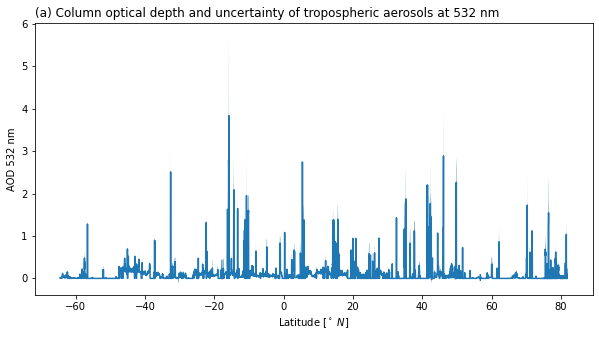

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

lats = dataset.latitude[:,1]
aod = dataset.column_optical_depth_tropospheric_aerosols_532[:, 0]
aod_uncert = dataset.column_optical_depth_tropospheric_aerosols_uncertainty_532[:, 0]
aod_uncert = aod_uncert.where(aod_uncert != -9999.)

plt.figure(figsize=(10, 5))
plt.plot(lats, aod)
plt.fill_between(lats, aod+aod_uncert, aod-aod_uncert)
plt.xlabel(r"Latitude [$^\circ\ N$]")
plt.ylabel("AOD 532 nm")
plt.title("(a) Column optical depth and uncertainty of tropospheric aerosols at 532 nm", loc="left")

Text(0.0, 1.0, '(b) Aerosol depolarisation ratio')

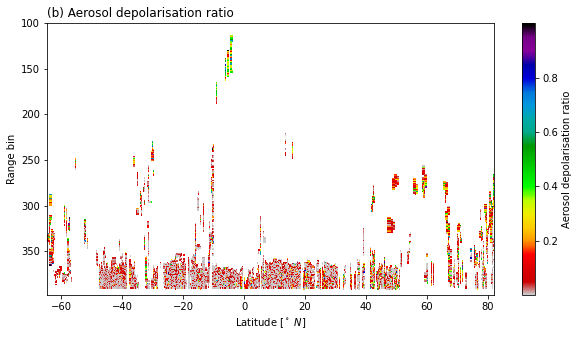

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

depol = dataset.particulate_depolarisation_ratio_532[:,100:]
depol = depol.where(depol > 0.)
depol = depol.where(depol < 1)
lats = dataset.latitude[:,1]
bins = dataset.range_bins[100:]

plt.figure(figsize=(10, 5))
plt.pcolormesh(lats, bins, depol.T, cmap=plt.get_cmap("nipy_spectral_r"))
plt.colorbar(label="Aerosol depolarisation ratio")
plt.gca().invert_yaxis()
plt.xlabel(r"Latitude [$^\circ\ N$]")
plt.ylabel("Range bin")
plt.title("(b) Aerosol depolarisation ratio", loc="left")

Text(0.0, 1.0, '(c) Aerosol layer fraction')

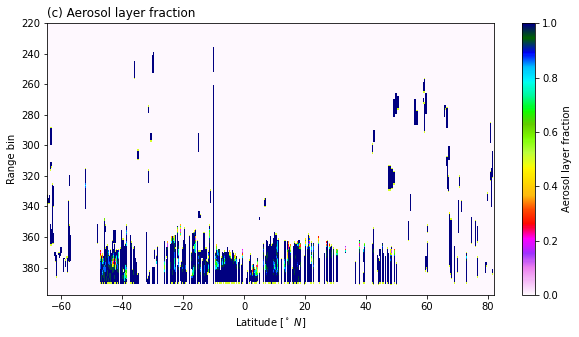

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# The aerosol profile data is given as 1/30, so need to convert to 1/1.
aerosol = dataset.aerosol_layer_fraction[:,220:]/30.
lats = dataset.latitude[:,1]
bins = dataset.range_bins[220:]

plt.figure(figsize=(10, 5))
plt.pcolormesh(lats, bins, aerosol.T, cmap=plt.get_cmap("gist_ncar_r"))
plt.colorbar(label="Aerosol layer fraction")
plt.gca().invert_yaxis()
plt.xlabel(r"Latitude [$^\circ\ N$]")
plt.ylabel("Range bin")
plt.title("(c) Aerosol layer fraction", loc="left")